In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neq = 10000

In [3]:
wkdir = os.getcwd()
datadir = wkdir + "/data/"

In [4]:
all_data_files = []
for datafile in os.listdir(datadir):
    if datafile.endswith('.csv'):
        all_data_files.append(datafile)

In [5]:
all_data_files

['ising_MC_T_1.200_J_1.000_L_10.csv',
 'ising_MC_T_2.600_J_1.000_L_10.csv',
 'ising_MC_T_3.600_J_1.000_L_10.csv',
 'ising_MC_T_3.400_J_1.000_L_10.csv',
 'ising_MC_T_1.400_J_1.000_L_10.csv',
 'ising_MC_T_1.600_J_1.000_L_10.csv',
 'ising_MC_T_2.200_J_1.000_L_10.csv',
 'ising_MC_T_0.800_J_1.000_L_10.csv',
 'ising_MC_T_0.200_J_1.000_L_10.csv',
 'ising_MC_T_2.800_J_1.000_L_10.csv',
 'ising_MC_T_0.600_J_1.000_L_10.csv',
 'ising_MC_T_2.400_J_1.000_L_10.csv',
 'ising_MC_T_2.000_J_1.000_L_10.csv',
 'ising_MC_T_3.200_J_1.000_L_10.csv',
 'ising_MC_T_0.400_J_1.000_L_10.csv',
 'ising_MC_T_1.800_J_1.000_L_10.csv',
 'ising_MC_T_3.000_J_1.000_L_10.csv',
 'ising_MC_T_1.000_J_1.000_L_10.csv',
 'ising_MC_T_3.800_J_1.000_L_10.csv',
 'ising_MC_T_4.000_J_1.000_L_10.csv']

In [18]:
df = pd.read_csv(datadir+all_data_files[0])
for i in range(1,len(all_data_files)):
    df2 = pd.read_csv(datadir+all_data_files[i])
    df = pd.concat([df, df2])
nulldata = df[df['T'].isna()]
print("There were "+str(len(nulldata))+" NaN entries in all data files")
#df.describe()
df = df.dropna()
df["T/J"] = df["T"]/(df["J"])
df["E/N"] = df["E"]/(df["L"]*df["L"])
df["M/N"] = np.abs(df["M"])/(df["L"]*df["L"])

There were 0 NaN entries in all data files


In [19]:
if len(nulldata) >0:
    print(nulldata)

In [20]:
df.head()

,step,E,M,T,J,L,T/J,E/N,M/N
0,0,-160.0,-12.0,1.2,1.0,10,1.2,-1.60,0.12
1,1,-280.0,-22.0,1.2,1.0,10,1.2,-2.80,0.22
2,2,-288.0,-30.0,1.2,1.0,10,1.2,-2.88,0.30
3,3,-304.0,-52.0,1.2,1.0,10,1.2,-3.04,0.52
4,4,-320.0,-72.0,1.2,1.0,10,1.2,-3.20,0.72


In [21]:
df.describe()

,step,E,M,T,J,L,T/J,E/N,M/N
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4000000.0,4.000000e+06,4.000000e+06,4.000000e+06
mean,9.999950e+04,-2.839578e+02,9.592033e+00,2.100000e+00,1.0,10.0,2.100000e+00,-2.839578e+00,6.654985e-01
std,5.773503e+04,1.191958e+02,7.573293e+01,1.153256e+00,0.0,0.0,1.153256e+00,1.191958e+00,3.739785e-01
min,0.000000e+00,-4.000000e+02,-1.000000e+02,2.000000e-01,1.0,10.0,2.000000e-01,-4.000000e+00,0.000000e+00
25%,4.999975e+04,-4.000000e+02,-6.400000e+01,1.150000e+00,1.0,10.0,1.150000e+00,-4.000000e+00,2.600000e-01
50%,9.999950e+04,-3.360000e+02,1.000000e+01,2.100000e+00,1.0,10.0,2.100000e+00,-3.360000e+00,9.000000e-01
75%,1.499992e+05,-1.600000e+02,9.800000e+01,3.050000e+00,1.0,10.0,3.050000e+00,-1.600000e+00,1.000000e+00
max,1.999990e+05,4.800000e+01,1.000000e+02,4.000000e+00,1.0,10.0,4.000000e+00,4.800000e-01,1.000000e+00


In [22]:
means = df[df["step"]>neq].groupby(["T/J"]).mean()

In [23]:
means.head()

,step,E,M,T,J,L,E/N,M/N
T/J,,,,,,,,
0.2,105000.0,-400.000000,100.000000,0.2,1.0,10.0,-4.000000,1.000000
0.4,105000.0,-400.000000,100.000000,0.4,1.0,10.0,-4.000000,1.000000
0.6,105000.0,-399.997642,99.999705,0.6,1.0,10.0,-3.999976,0.999997
0.8,105000.0,-399.923115,-99.990326,0.8,1.0,10.0,-3.999231,0.999903
1.0,105000.0,-399.440629,-99.928600,1.0,1.0,10.0,-3.994406,0.999286


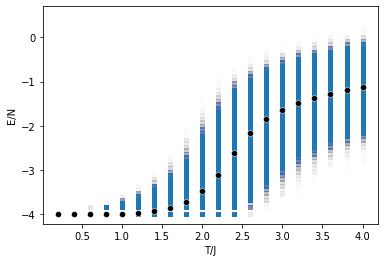

In [24]:
ax = sns.scatterplot(data = df[df["step"]>neq], x = "T/J", y = "E/N", alpha = 0.005)
ax = sns.scatterplot(data = means, x = "T/J", y = "E/N", color = "black", alpha = 1)

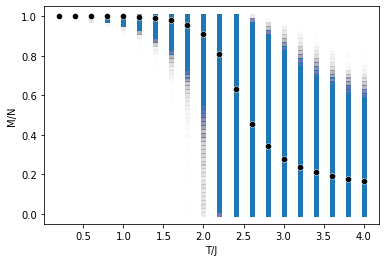

In [27]:
ax = sns.scatterplot(data = df[df["step"]>neq], x = "T/J", y = "M/N", alpha = 0.005)
ax = sns.scatterplot(data = means, x = "T/J", y = "M/N", color = "black", alpha = 1)

In [42]:
df_sparse = df[df.index % 500 == 0]

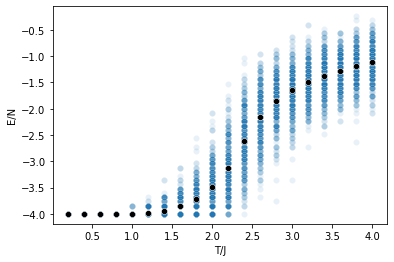

In [43]:
ax = sns.scatterplot(data = df_sparse[df_sparse["step"]>neq], x = "T/J", y = "E/N", alpha = 0.1)
ax = sns.scatterplot(data = means, x = "T/J", y = "E/N", color = "black", alpha = 1)

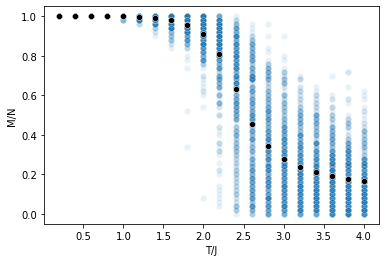

In [44]:
ax = sns.scatterplot(data = df_sparse[df_sparse["step"]>neq], x = "T/J", y = "M/N", alpha = 0.1)
ax = sns.scatterplot(data = means, x = "T/J", y = "M/N", color = "black", alpha = 1)